# 跨频率耦合图解

## 引言
先来通过一个交互式例子感受一下跨频率耦合,建立起一些直观的感受.

```{note}
点击下面的`Activate`,再点击`run`来启动交互
```

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.css" integrity="sha512-5A8nwdMOWrSz20fDsjczgUidUBR8liPYU+WymTZP1lmY9G6Oc7HlZv156XqnsgNUzTyMefFTcsFH/tnJE/+xBg==" crossorigin="anonymous" />
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js"></script>

<script type="text/x-thebe-config">
  {
    requestKernel: true,
    binderOptions: {
      repo: "matplotlib/ipympl",
      ref: "0.6.1",
      repoProvider: "github",
    },
  }
</script>
<script src="https://unpkg.com/thebe@latest/lib/index.js"></script>



<pre data-executable="true" data-language="python">
from ipywidgets import interactive
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
import numpy as np
plt.rcParams['figure.figsize'] = (10.0, 10.0)
def set_center_axis(ax):
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))
seconds = 1
sample_rate =500
def cfc_data(slow_ph=0,slow_ap=1,fast_ph=0,fast_ap=1):
    t = np.linspace(0, seconds, seconds*sample_rate)
    slow = np.sin(2*np.pi*5*t+slow_ph)*slow_ap
    fast = np.cos(2*np.pi*37*t+fast_ph)*fast_ap
    fast_am = 0.5*slow + 0.5
    x = slow + fast * fast_am + np.random.randn(*t.shape) * .05
    return slow,fast,fast_am,x,t
def cfc_draw(slow_ph,slow_ap,fast_ph,fast_ap):
    slow,fast,fast_am,x,t=cfc_data(slow_ph,slow_ap,fast_ph,fast_ap)
    fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1)
    ax1.plot(t[:sample_rate], slow[:sample_rate])
    textstr = '\n'.join((r'$slow=%.2f sin(2\cdot5\pi t+%.2f\pi)$' % (slow_ap,slow_ph/np.pi ),))
    ax1.text(0.05,0.5,textstr,fontsize = 25)
    ax2.plot(t[:sample_rate], fast[:sample_rate])
    textstr = '\n'.join((r'$fast=%.2f cos(2\cdot37\pi t+%.2f\pi)$' % (fast_ap,fast_ph/np.pi ),))
    ax2.text(0.05,0.5,textstr,fontsize = 25)
    ax3.plot(t[:sample_rate], fast_am[:sample_rate])
    ax3.text(0.05,0.5,'$fast\_am = 0.5\cdot slow + 0.5$',fontsize = 25)
    ax4.plot(t[:sample_rate], x[:sample_rate])
    ax4.text(0.05,0.5,'$x=slow+fast\cdot fast\_am + 0.05random$',fontsize = 25)
    for ax in (ax1,ax2,ax3,ax4):
        set_center_axis(ax)
        
def F(slow_ph,slow_ap,fast_ph,fast_ap):
    cfc_draw(slow_ph,slow_ap,fast_ph,fast_ap)
interactive_plot = interactive(F,slow_ph=(0,2*np.pi,0.1*np.pi),slow_ap=(0,2,0.1),fast_ph=(0, 2*np.pi, 0.05*np.pi),fast_ap=(0,2,0.1))
interactive_plot
</pre>

<button id="activateButton" style="width: 120px; height: 40px; font-size: 1.5em;">
  Activate
</button>
<script>
var bootstrapThebe = function() {
    thebelab.bootstrap();
}
document.querySelector("#activateButton").addEventListener('click', bootstrapThebe)
</script>

In [5]:
# This cell has a remove-cell tag
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
import numpy as np
plt.rcParams['figure.figsize'] = (10.0, 10.0)
def set_center_axis(ax):
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))
seconds = 60
sample_rate =500
def cfc_data(slow_ph=0,slow_ap=1,fast_ph=0,fast_ap=1):
    t = np.linspace(0, seconds, seconds*sample_rate)
    slow = np.sin(2*np.pi*5*t+slow_ph)*slow_ap
    fast = np.cos(2*np.pi*37*t+fast_ph)*fast_ap
    fast_am = 0.5*slow + 0.5
    x = slow + fast * fast_am + np.random.randn(*t.shape) * .05
    return slow,fast,fast_am,x,t
def cfc_draw(slow_ph,slow_ap,fast_ph,fast_ap):
    slow,fast,fast_am,x,t=cfc_data(slow_ph,slow_ap,fast_ph,fast_ap)
    fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1)
    ax1.plot(t[:seconds*4], slow[:seconds*4])
    textstr = '\n'.join((r'$slow=%.2f sin(2\cdot5\pi t+%.2f\pi)$' % (slow_ap,slow_ph/np.pi ),))
    ax1.text(0.05,0.5,textstr,fontsize = 25)
    ax2.plot(t[:seconds*4], fast[:seconds*4])
    textstr = '\n'.join((r'$fast=%.2f cos(2\cdot37\pi t+%.2f\pi)$' % (fast_ap,fast_ph/np.pi ),))
    ax2.text(0.05,0.5,textstr,fontsize = 25)
    ax3.plot(t[:seconds*4], fast_am[:seconds*4])
    ax3.text(0.05,0.5,'$fast\_am = 0.5\cdot slow + 0.5$',fontsize = 25)
    ax4.plot(t[:seconds*4], x[:seconds*4])
    ax4.text(0.05,0.5,'$x=slow+fast\cdot fast\_am + 0.05random$',fontsize = 25)
    for ax in (ax1,ax2,ax3,ax4):
        set_center_axis(ax)

下图中,slow是一个低频正弦信号,fast是一个高频余弦信号.您可以拖动下面的四个滑块来改变这两个信号的幅值和相位.x是上述两个信号的混合,试着拖动滑块,看一下对信号x会产生什么影响.

In [6]:
# This cell has a hide-cell tag
def F(slow_ph,slow_ap,fast_ph,fast_ap):
    cfc_draw(slow_ph,slow_ap,fast_ph,fast_ap)
interactive_plot = interactive(F,slow_ph=(0,2*np.pi,0.1*np.pi),slow_ap=(0,2,0.1),fast_ph=(0, 2*np.pi, 0.05*np.pi),fast_ap=(0,2,0.1))
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

interactive(children=(FloatSlider(value=3.141592653589793, description='slow_ph', max=6.283185307179586, step=…

跨频率耦合一共有三种形式:
1. 相-相耦合（phase-phase coupling，PPC)；
2. 相-幅耦合（phase-amplitude coupling，PAC）；
3. 幅-幅耦合（amplitude-amplitude coupling，AAC）.

上面的交互式例子展示的是低频相位调制高频幅度,属于相-幅耦合.

## 如何对跨频率耦合现象进行分析和量化?

目前研究得比较多的是相-幅耦合,其耦合程度可以用同步化指标$PAC$来计算:

$$
P A C=\left|n^{-1} \sum_{t=1}^{n} a_{t} e^{i \phi_{t}}\right|
$$

其中$n$表示时间点的总数,$t$表示时间点,$a_t$表示高频信号在$t$时刻的功率,$\phi_t$表示低频信号在$t$时刻的相位,$i$为复数单位.

那么,跨频率耦合分析可以分三步走:
1. 将信号分为高频段和低频段；
2. 从滤波后的信号中提取振幅和相位；
3. 确定相位和振幅是否相关(计算PAC).


### 步骤一:将信号分为高频段和低频段

以上文交互式模组中的数据为例,进行分析.

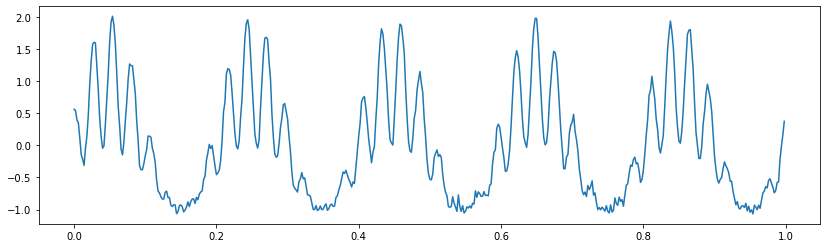

In [3]:
from pylab import *
slow,fast,fast_am,x,t=cfc_data()
figure(figsize=(14, 4))         # Create a figure with a specific size.
plot(t[:sample_rate*1], x[:sample_rate*1])

观察上图,可以猜测这个信号可能由一个5Hz的低频信号和一个25Hz以上的高频信号叠加而成.
对数据进行傅利叶变换,得到其功率谱,确认一下信号的频率成分.

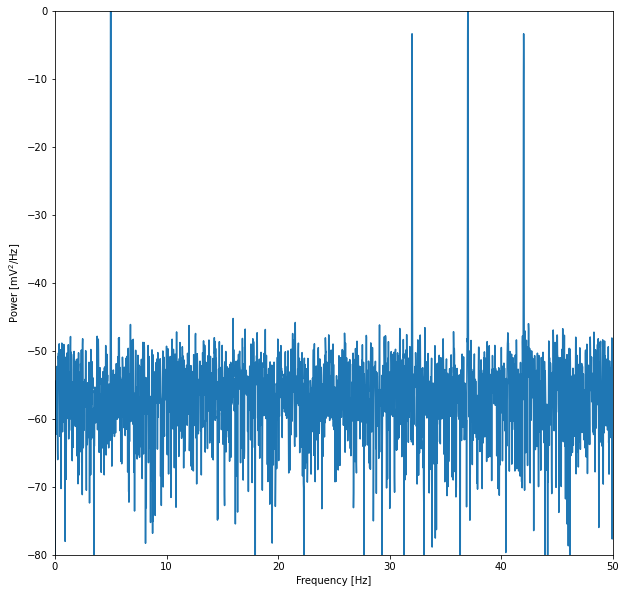

In [4]:
LFP = x

dt = t[1] - t[0]                # 定义采样间隔
T = t[-1]                       # ... 数据的持续时间,
N = len(LFP)                    # ... 数据点数

x_h = hanning(N) * LFP          # 将数据乘以汉宁窗
xf = rfft(x_h - x_h.mean())      # 计算傅里叶变换 
Sxx = 2*dt**2/T * (xf*conj(xf)) # 计算功率谱
Sxx = real(Sxx)                 # 留下实部

df = 1 / T                      # 定义的频率分辨率,
fNQ = 1 / dt / 2                # ... 和奈奎斯特频率 

faxis = arange(0, fNQ + df, df) # 构造频率坐标
plt.plot(faxis, 10 * log10(Sxx))# 绘制频谱与频率.
xlim([0, 50])                   # 设置频率范围, 
ylim([-80, 0])                  # ... 和功率范围
xlabel('Frequency [Hz]')        # 给坐标轴打上标签
ylabel('Power [mV$^2$/Hz]');


功率谱密度图显示,该信号主要由一个5Hz左右的低频和一个30~45Hz左右的高频组成.因此,信号可以划分为:
- 低频带: $[2,7]Hz$
- 高频带: $[30,45]Hz$

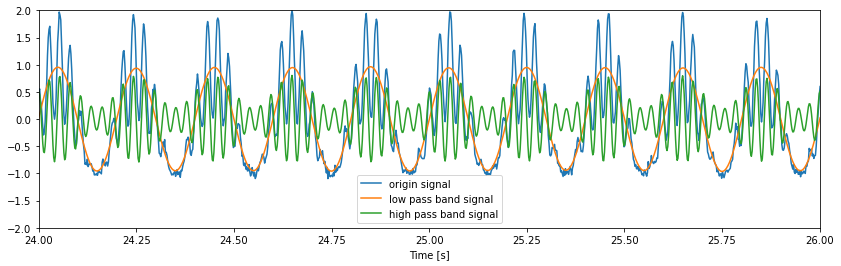

In [5]:
from scipy import signal
Wn = [2,7];                         # 设置通频带[2-7]Hz，
n = 100;                            # ... 和滤波器阶数,
                                    # ... 构建带通滤波器,
b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming');
Vlo = signal.filtfilt(b, 1, LFP);     # ... 将其应用到数据中.

Wn = [30, 45];                      # 设置通频带[30-45]Hz,
n = 100;                            # ... 和滤波器阶数,
                                    # ... 构建带通滤波器,
b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming');
Vhi = signal.filtfilt(b, 1, LFP);     # ... 将其应用到数据中.

figure(figsize=(14, 4))           
plot(t, LFP)                    
plot(t, Vlo)                    
plot(t, Vhi)                    
xlabel('Time [s]')
xlim([24, 26]);                 
ylim([-2, 2]);
legend(['origin signal', 'low pass band signal', 'high pass band signal']);  

### 步骤二:从滤波后的信号中提取振幅和相位

在上一个步骤中,低频成分和高频成分被从原始信号中分解出来了,接下来提取低频成分的相位和高频成分的幅值.
在这个步骤中使用到了希尔伯特变换.关于希尔伯特变换的内容,笔者将在另一篇博客中展开.

(0.0, 500.0)

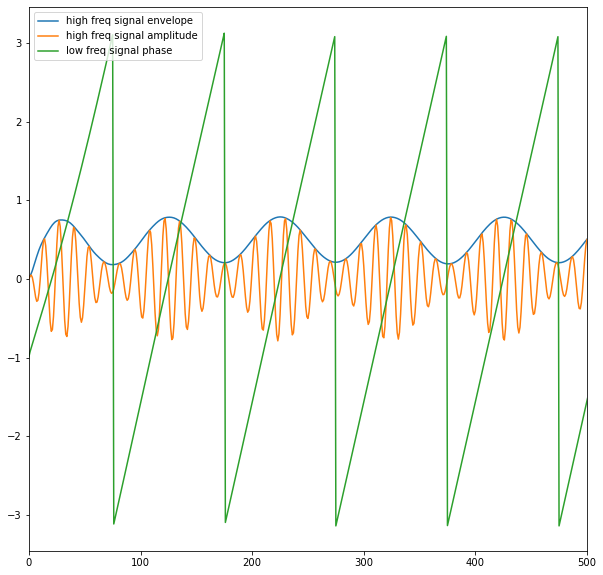

In [6]:
phi = angle(signal.hilbert(Vlo))     # 计算低频成分相位
amp = abs(signal.hilbert(Vhi))       # 计算高频成分的幅值
plot(amp)
plot(Vhi)
plot(phi)
legend(['high freq signal envelope', 'high freq signal amplitude', 'low freq signal phase']);  
xlim([0,500])

### 步骤三: 确定相位和振幅是否相关(计算PAC)

$$
P A C=\left|n^{-1} \sum_{t=1}^{n} a_{t} e^{i \phi_{t}}\right|
$$

PAC= 0.49317710887774724


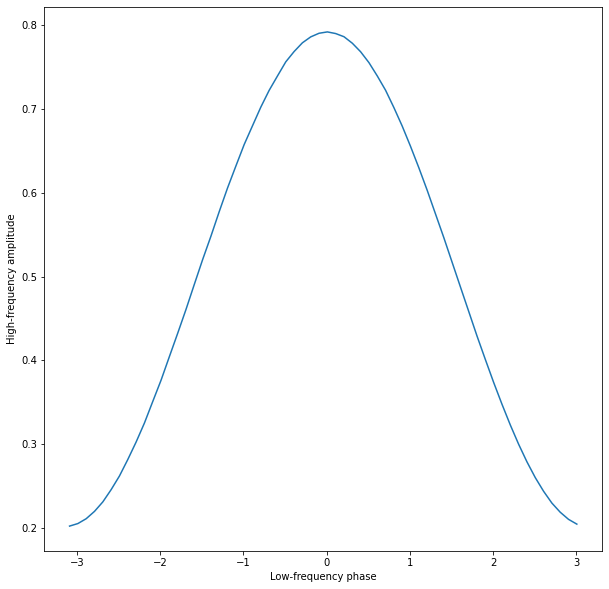

In [7]:
p_bins = arange(-pi, pi, 0.1)
a_mean = zeros(size(p_bins)-1)
p_mean = zeros(size(p_bins)-1)
for k in range(size(p_bins)-1):     #对于每个相位区间,
    pL = p_bins[k]                  #... 左范围,
    pR = p_bins[k+1]                #... 右范围.
    indices=(phi>=pL) & (phi<pR)    #找到落在区间中的相位的索引,
    a_mean[k] = mean(amp[indices])  #... 计算平均振幅,
    p_mean[k] = mean([pL, pR])      #... 保存中间相位.
    
plot(p_mean, a_mean)                #画出相位与振幅的曲线,
ylabel('High-frequency amplitude') 
xlabel('Low-frequency phase');

PAC = a_mean.sum()/size(p_bins)     #计算PAC
print('PAC=',PAC)

还可以使用假设检验的方法来进一步研究其显著性

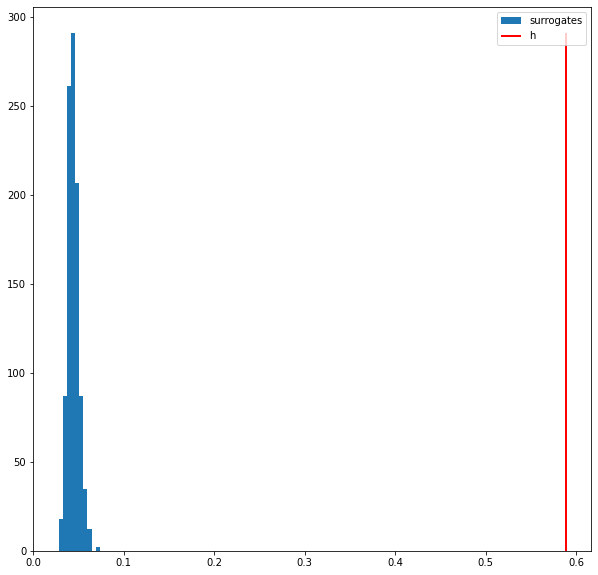

In [8]:
h = max(a_mean)-min(a_mean)

n_surrogates = 1000;                    #Define no. of surrogates.
hS = zeros(n_surrogates)                #Vector to hold h results.
for ns in range(n_surrogates):          #For each surrogate,
    ampS = amp[randint(0,N,N)]          #Resample amplitude,
    p_bins = arange(-pi, pi, 0.1)       #Define the phase bins
    a_mean = zeros(size(p_bins)-1)      #Vector for average amps.
    p_mean = zeros(size(p_bins)-1)      #Vector for phase bins.
    for k in range(size(p_bins)-1):
        pL = p_bins[k]                  #... lower phase limit,
        pR = p_bins[k+1]                #... upper phase limit.
        indices=(phi>=pL) & (phi<pR)    #Find phases falling in bin,
        a_mean[k] = mean(ampS[indices]) #... compute mean amplitude,
        p_mean[k] = mean([pL, pR])      #... save center phase.
    hS[ns] = max(a_mean)-min(a_mean)    # Store surrogate h.
    
counts, _, _ = hist(hS, label='surrogates')               # Plot the histogram of hS, and save the bin counts.
vlines(h, 0, max(counts), colors='red', label='h', lw=2)  # Plot the observed h,
legend();                                                 # ... include a legend.

In [9]:
p = sum([s > h for s in hS]) / len(hS)
print(p)

0.0


In [4]:
import IPython
url = '//player.bilibili.com/player.html?aid=462746265&bvid=BV1rL41147Xn&cid=400866786&page=1'
IPython.display.IFrame(url,width=700,height=400)